<a href="https://colab.research.google.com/github/rifyalt/basic_python/blob/main/14_Quantitive_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview Materi
Pada materi-materi sebelumnya telah di perkenalkan tentang pondasi-pondasi visualisasi. Dari sekarang dan ke depan materi akan lebih advance lagi, pertama akan di perkenalkan beberapa bentuk visualisasi lainnya (sebelumnya telah di pelajari lineplot), kemudian akan di tunjukan kegunaannya untuk perbandingan kuantitatif.

Langsung saja. beberapa bentuk visualisasi yang akan di perkenalkan adalah :

*   Bar Chart
*   Scatter Plot
* Histogram

Akan di gunakan data tentang penjualan video games dalam satuan juta dollar, yang mana filenya bisa di download disini.

Datanya sebagai berikut :

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/PKS Digi School/Pekan 3/vgsales.csv'
df = pd.read_csv(path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Pengenalan Beberapa Bentuk Visualisasi

## Bar Chart
Bar chart bisa di buat dengan method bar. Bar chart berguna untuk memvisualisasikan frekuensi kejadian suatu data berdasarkan suatu kategori. Jadi, bar chart ini di visualisasikan untuk membandingkan data yang bertipe kategori. Bar chart berguna bila jumlah kategori tidak lebih dari 30 pada umumnya. Apabila lebih dari itu, biasanya bar chart akan menjadi kacau sehingga data sulit untuk di interpretasi.

Berikut contoh sederhana dari visualisasi bar chart:

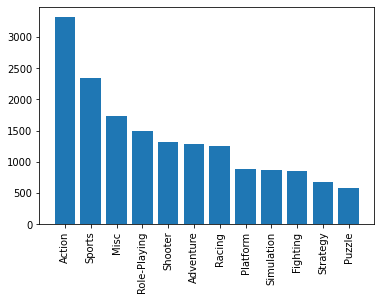

In [5]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

# read data vgsales
df = pd.read_csv(path)

# extract data tentang banyaknya setiap jenis genre dalam data
data = df['Genre'].value_counts()
category = data.index
frequency = data.values

# plot data
fig, ax = plt.subplots()
ax.bar(category, frequency)
ax.set_xticklabels(category, rotation=90)
plt.show()

Dari gambar di atas dapat di lihat bahwa data ini memiliki paling banyak data video games dengan genre Action, kemudian Sport, dan seterusnya.

Method set_xticklabels() adalah untuk mengontrol komponen label data di sumbu x. di berikan label nya dengan data category, dan di putar sebesar 90 derajat agar label tidak bertumpuk.

Pada bahasan selanjutnya akan di tunjukan improvisasi terhadap visualisasi ini.

## Scatter Plot
Scatter plot berguna untuk melakukan perbandingan data antara data bertipe numerik. untuk melakukan visualisasi scatter plot bisa dilakukan menggunakan method scatter().

Contoh akan di visualisasikan dengan scatter plot data tentang penjualan semua video games di jepang dan Europa.

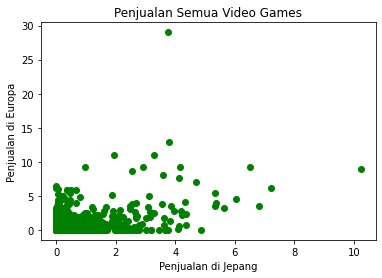

In [6]:
fig, ax = plt.subplots()

# pembuatan plot
ax.scatter(df['JP_Sales'], df['EU_Sales'], c='g')

# axis labeling
ax.set_xlabel('Penjualan di Jepang')
ax.set_ylabel('Penjualan di Europa')
##ax.set_title('Penjualan Semua Video Games')

plt.show()

## Histogram

Histogram mempunyai kemiripan dengan bar chart, beberapa keliru memahami bahwa bar chart sama dengan histogram. Kunci dari perbedaannya adalah Histogram untuk memvisualisasikan distribusi data dari suatu data bertipe numerik dan continues. sedangan bar chart untuk memvisualisasikan data bertipe kategori.

Misalkan ingin mengetahui perbedaan distribusi penjualan video games di seluruh dunia untuk game bergenre Action dan Sport. Berikut adalah contoh visualisasi dari Histogram nya :

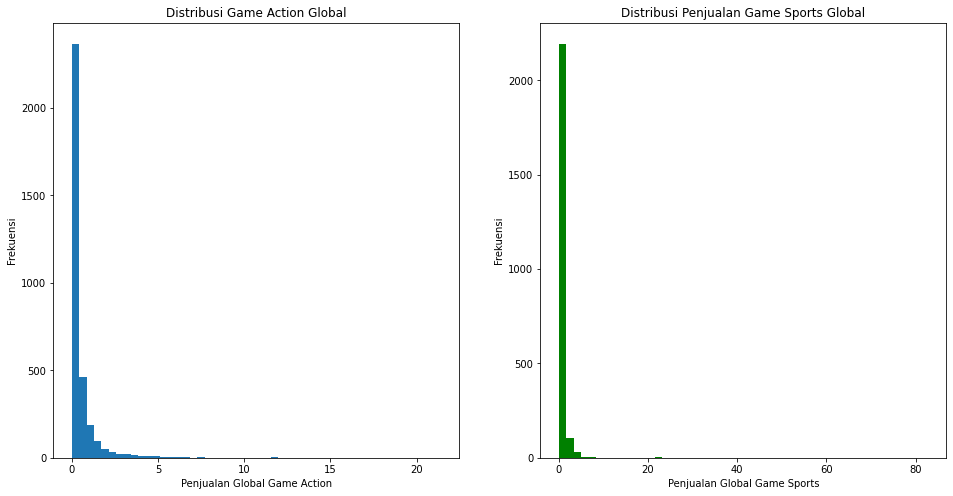

In [7]:
action = df[df['Genre']=='Action']['Global_Sales']
sport = df[df['Genre']=='Sports']['Global_Sales']

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
ax[0].hist(action, bins=50)
ax[0].set_xlabel('Penjualan Global Game Action')
ax[0].set_ylabel('Frekuensi')
ax[0].set_title('Distribusi Game Action Global')

ax[1].hist(sport, bins=50, color='g')
ax[1].set_xlabel('Penjualan Global Game Sports')
ax[1].set_ylabel('Frekuensi')
ax[1].set_title('Distribusi Penjualan Game Sports Global')
plt.show()

## Stacked Bar Chart

Stacked Bar Chart digunakan untuk membandingkan total value pada bebrapa kategori, seperti contoh kita akan menggunakan dataset Iris:

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

path2 = '/content/drive/MyDrive/PKS Digi School/Pekan 3/Iris.csv'

df = pd.read_csv(path2, index_col=0)
df_group = df.groupby('Species').mean()
df_group.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


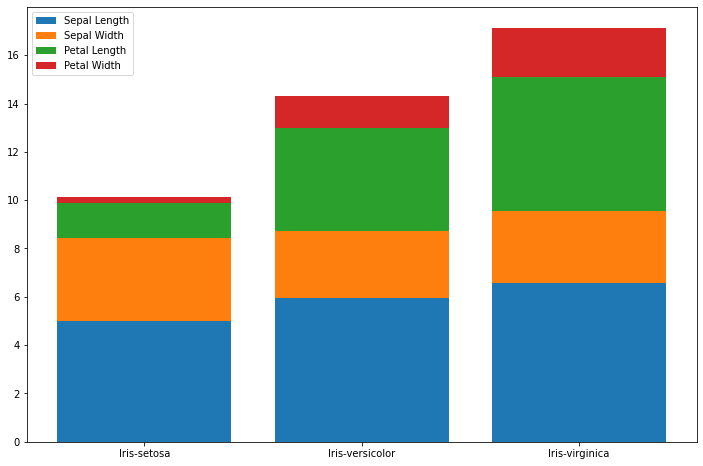

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_group.index, df_group['SepalLengthCm'], label='Sepal Length')
ax.bar(df_group.index, df_group['SepalWidthCm'], bottom=df_group['SepalLengthCm'], label='Sepal Width')
ax.bar(df_group.index, df_group['PetalLengthCm'], bottom=df_group['SepalLengthCm']+df_group['SepalWidthCm'], label='Petal Length')
ax.bar(df_group.index, df_group['PetalWidthCm'], bottom=df_group['SepalLengthCm']+df_group['SepalWidthCm']+df_group['PetalLengthCm'], label='Petal Width')
plt.legend()
plt.show()

## Statistical Plot

Statistical plot digunakan untuk melihat grafik statistik data. Kita akan coba melakukan statistical plot data Iris menggunakan bar chart dengan melakukan plot central tendency dan sebaran data dalam unit standar deviasi.

In [11]:
df_mean = df.mean()
df_mean

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

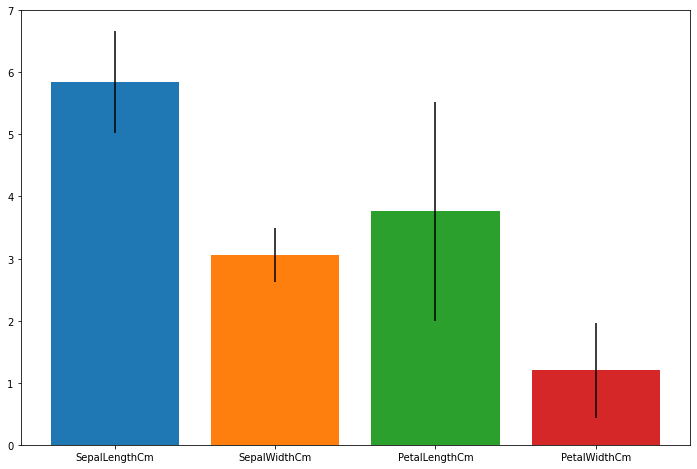

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(df_mean)):
    ax.bar(df_mean.index[i], df_mean.values[i], yerr=df.std()[i])

plt.show()

Gambar diatas menunjukkan bahwa bar chart merepresentasikan central tendency berupa nilai mean dari data Iris sedangkan garis hitam menunjukkan standar deviasi dari data tersebut. Petal Length memiliki sebaran data yang paling lebar sedangkan Sepal Width memiliki sebaran data yang paling kecil, artinya distribusi Sepal Width terpusat d satu titik tidak begitu menyebar.

# Materi Video:
*   [Scatter Plot](https://youtu.be/eU2eUohmjkI)
*   [Bar Charts](https://youtu.be/yQ5htezlrkU)

